### 심층 신경망(DNN)
>- 은닉층(Hidden Layer)이 여러 개(2개 이상) 있는 신경망
>- 입력층 → 은닉층1 → 은닉층2 → 은닉층3 → 출력층

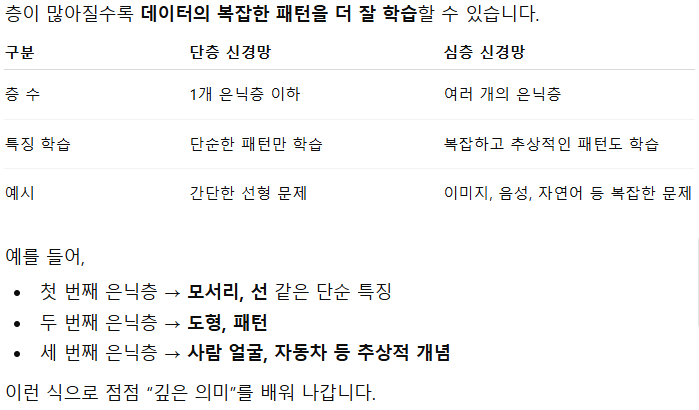

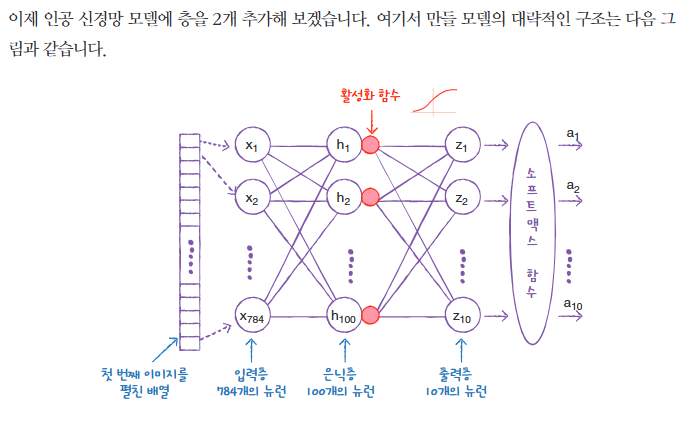

In [1]:
from IPython.display import Image, display
display(Image(filename="data/img10.png", width=600, height=400))
display(Image(filename="data/img11.png", width=600, height=400))

### 활성화 함수란?
>- 뉴런의 출력값을 “비선형적으로 변환”해주는 함수
>- 신경망의 각 층(노드)은 입력을 받아 가중치(weight)를 곱하고, 그 합에 활성화 함수를 적용합니다.
>- 성화 함수가 없으면 전체 신경망이 단순한 선형 회귀(직선 관계) 밖에 표현하지 못합니다.
#### 왜 필요한가?
##### 1. 비선형성 (Non-linearity)
 - 현실 데이터는 대부분 비선형 관계입니다.
 - 활성화 함수가 없으면 층을 여러 개 쌓아도 결국 “하나의 직선”과 다를 바 없습니다.
 - 활성화 함수를 써야 곡선적 패턴, 복잡한 데이터 구조를 학습할 수 있습니다.
##### 2. 출력 범위 조정
- 어떤 활성화 함수는 출력을 0~1, 혹은 -1~1로 제한해줍니다.
- 이건 출력값의 안정성과 **학습 안정성(기울기 폭주 방지)**에 도움을 줍니다.

In [2]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import keras
import tensorflow as tf

# 현재 사용자 홈 디렉터리 아래 .keras/datasets 폴더 저장위치
# 모델 가중치 초기화, 데이터 섞기(shuffle), Dropout 등 무작위 요소를 고정합니다.
# 딥러닝 결과가 매번 달라지지 않게 하려면 반드시 필요합니다.
keras.utils.set_random_seed(42)
# 이 한 줄은 TensorFlow 실행 결과를 매번 똑같이(결정적으로, deterministic) 나오게 만드는 설정
# “연산 순서 제어용” ,즉, 시드가 같아도 GPU 병렬처리 순서가 달라지는 걸 방지합니다.
tf.config.experimental.enable_op_determinism()

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
# 10개의 클래스, 6000개씩 훈련 샘플
# 입력값은 3차원,  target은 1차원 벡터
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
inputs = keras.layers.Input(shape=(784,))
# Dense Layer (완전 연결층): 모든 입력이 모든 뉴런과 연결됨
# 100개 뉴런을 가진 은닉층(hidden layer)
# 활성화 함수(sigmoid): 출력값을 0~1 사이로 변환 
#  → 비선형성을 주어 복잡한 패턴 학습 가능
# 최근에는 sigmoid 대신 ReLU를 더 자주 사용(**기울기 소실 문제**가 발생하기 때문)
dense1 = keras.layers.Dense(100, activation='sigmoid')
# 출력층 : Fashion-MNIST는 10개의 클래스(의류 종류)가 있으므로 뉴런 수도 10개
# softmax 활성화 함수 → 각 클래스에 대한 확률로 변환(모든 확률의 합이 1이 되게 만듦)
dense2 = keras.layers.Dense(10, activation='softmax')

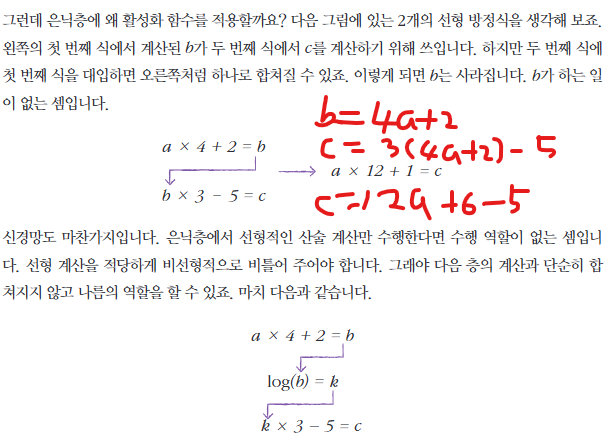

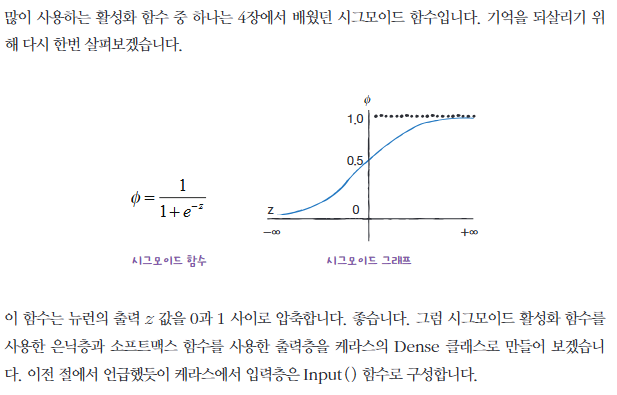

In [7]:
display(Image(filename="data/img12.png", width=600, height=400))
display(Image(filename="data/img13.png", width=600, height=400))

### 심층 신경망 만들기

In [8]:
model = keras.Sequential([inputs, dense1, dense2])

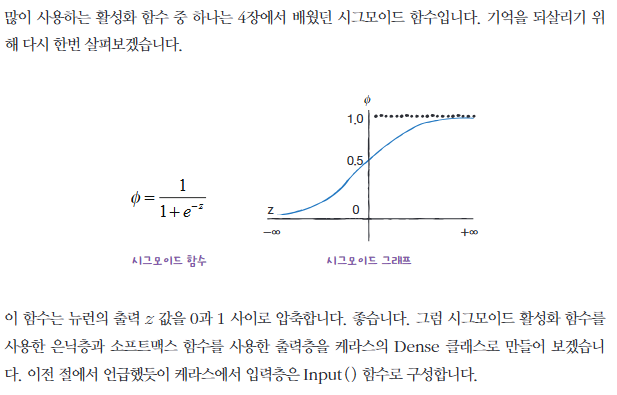

In [9]:
display(Image(filename="data/img13.png", width=600, height=400))

In [10]:
model.summary()

# 첫번째 줄
# 입력층 → 첫 번째 Dense층 
# 입력 데이터 크기: 784 (28×28 이미지 한 장을 1D로 펼친 것)
# 뉴런 개수: 100개
# Param = (입력수 * 출력수) + 편향 수
#  (784 * 100) + 100 = 78,400(가중치) + 100(편향) = 78,500 
# --------------------------
# 두번째 층
# 첫 번째 은닉층(100개 뉴런)의 출력 → 출력층(Dense 10개 뉴런)
# 10개의 클래스(옷 종류 10가지)를 구분
#  (100 * 10)(가중치) + 10(편향) = 1010

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ dense (Dense)                       │ (None, 100)                │         78,500 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_1 (Dense)                     │ (None, 10)                 │          1,010 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

### 층을 추가하는 다른 방법

In [11]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='sigmoid', name='은닉층'),
    keras.layers.Dense(10, activation='softmax', name='출력층')
], name='패션 MNIST 모델')

In [12]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ 은닉층 (Dense)                      │ (None, 100)                │         78,500 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ 출력층 (Dense)                      │ (None, 10)                 │          1,010 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                     │ (None, 100)                │         78,500 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_3 (Dense)                     │ (None, 10)                 │          1,010 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8064 - loss: 0.5710  
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8502 - loss: 0.4133  
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8620 - loss: 0.3769   
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8713 - loss: 0.3531  
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8781 - loss: 0.3352


In [16]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.8695 - loss: 0.3568 


[0.35684970021247864, 0.8694999814033508]

### 렐루 활성화 함수

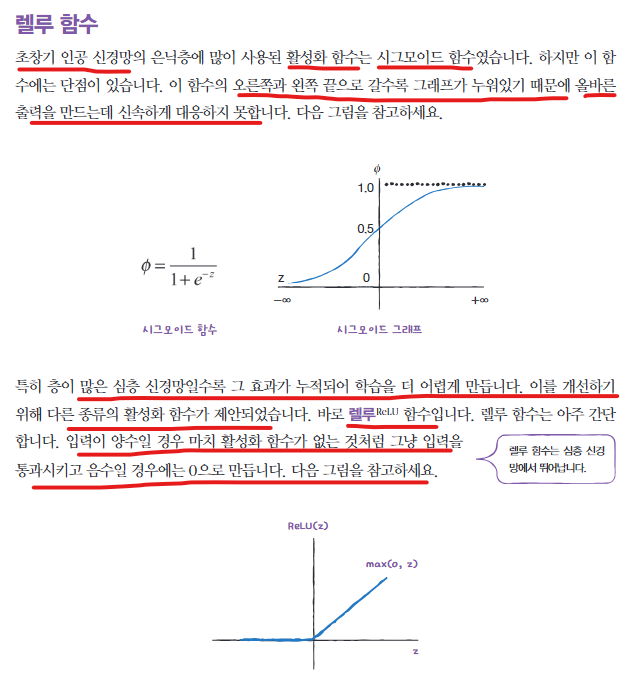

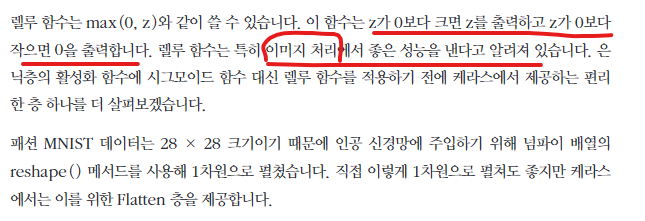

In [17]:
display(Image(filename="data/img15.png", width=600, height=400))
display(Image(filename="data/img16.png", width=600, height=400))

In [18]:
# Flatten = 납작하게 펴기 (다차원 → 1차원)
# 입력 데이터의 구조를 바꾸는 층입니다.
# 이미지는 보통 (height, width) 또는 (height, width, channel) 형태로 되어 있는데,
# Dense 층은 1차원 벡터만 입력받을 수 있습니다.
# 그래서 Flatten()이 중간에서 “변환기” 역할을 합니다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                   │ (None, 784)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_4 (Dense)                     │ (None, 100)                │         78,500 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_5 (Dense)                     │ (None, 10)                 │          1,010 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8113 - loss: 0.5291
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8581 - loss: 0.3915  
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8729 - loss: 0.3529  
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8817 - loss: 0.3288  
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8878 - loss: 0.3131  


In [22]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.8662 - loss: 0.3863 


[0.38631802797317505, 0.8661666512489319]

### 옵티마이저
>- 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공하는데 이들을 **옵티마이저**라고 부른다.
>- “모델이 가중치(weight) 와 편향(bias) 를 얼마나, 어떻게 바꿔야 할지 결정하는 뇌(두뇌 역할)”입니다.
>- 학습의 핵심 엔진이에요
>- 손실함수(loss function)를 최소화하기 위해 가중치(w), 편향(b) 을 업데이트하는 알고리즘입니다.

### 동작 원리 요약
>- 모델이 예측 -> 손실 계산
>- 손실이 얼마나 큰지 **기울기** 계산
>- 옵티마이저가 그 기울기 방향으로 **가중치(w), 편향(b)** 를 조정
>- 반복하면서 손식을 최소화

##### 케라스는 기본적으로 미니 배치 경사 하강법을 사용하며 미니배치 개수는 32개
##### fit() 메서드의 batch_size 매개변수에서 이를 조정
##### fit() 메서드의 epochs 매개변수도 이를 조정
##### compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용했음
##### 

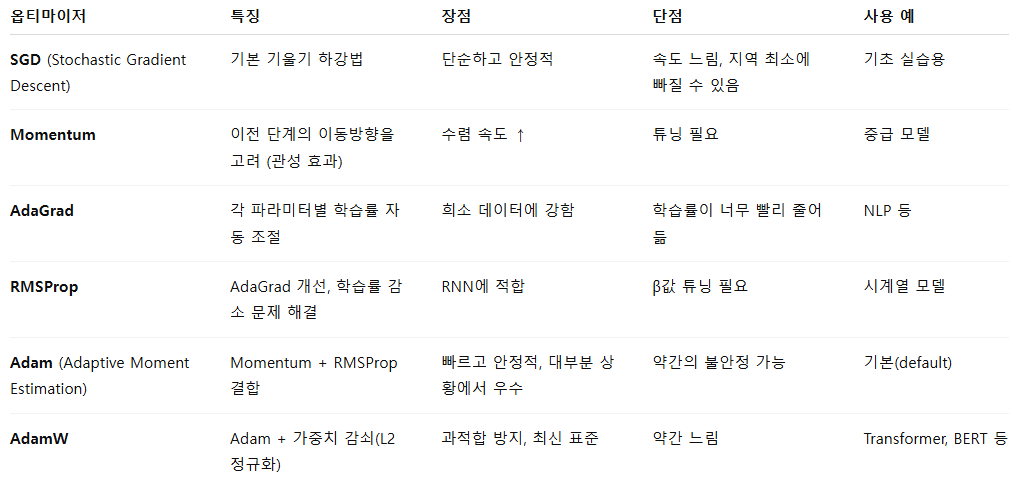

In [23]:
display(Image(filename="data/img17.png", width=600, height=400))
# 옵티마이저(Optimizer) 는 딥러닝에서 가중치를 어떻게 바꿀지 결정하는 학습 엔진입니다.
# 가장 많이 쓰는 건 Adam이며, “손실을 빠르고 안정적으로 줄여주는 똑똑한 경사하강법”이라고 보면 됩니다.

In [24]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# SGD  클래스의 학습률 기본 값은 0.01이다. 
# 아래는 학습률을 0.1로 변경
# 학습율이란 가중치를 얼마나 크게 업데이트할지 결정하는 것
# 즉, 기울기를 따라 내려갈때 한번에 얼마 만큼 움직일지를 결정
# 지금은 기울기의 10% 만큼 이동
# 0.0001 너무 느림, 손실이 즐어드는  속도가 매우 느림
# 0.01 적당함
# 0.1 빠르지만 불안정, 최소점(정담)을 지나쳐서 발산 할 수 있
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [27]:
# 기본 SGD(확률적 경사하강법) 을 더 빠르고 안정적으로 학습시키기 위한 업그레이드 버전
# Momentum (모멘텀) ; 기울기에 "관성"을 주는 방법
# 이전에 이동했던 방향을 기억해서 그 방향으로 조금 더 밀어주는 효과를 줍니다.
# 이렇게 하면 움직임이 부드러워지고, 수렴 속도가 빨라집니다.
# 보통 0.9 또는 0.99 사용 
# 0.9는 “이전 이동방향을 90% 정도 유지한다”
# Nesterov Momentum (네스테로프 모멘텀) : 모멘텀의 “개선 버전”입니다. 다음 위치를 미리 예측해서 계산하는 방식
# nesterov=True 는  네스테로프 최적화를 지정하는 것 (모멘텀 최적화를 2번 반복하는 듯한 효과를 냄)                
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [28]:
# 적응적 학습률 : 모델이 최적점에 가까이 갈수록 학습률을 낮출수 있다. 이렇게 하면 안정적으로 최적점을 수렴할 가능성이 높다.
# 적응적 학습률(Adaptive Learning Rate)이란?
# 각 가중치마다 “상황에 맞는 학습률”을 자동으로 조절하는 방법입니다.
# 즉, “모든 파라미터가 같은 속도로 배우는 게 아니라, 각자에게 맞는 속도로 배운다.”
# 적응적 학습률 옵티마이저 : Adagrad(), RMSprop()
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8154 - loss: 0.5262
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8576 - loss: 0.3955   
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8723 - loss: 0.3513  
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8829 - loss: 0.3230
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8905 - loss: 0.3017


In [32]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.8751 - loss: 0.3442 


[0.34416502714157104, 0.875083327293396]

In [33]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6391 - loss: 1.1827   
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.7570 - loss: 0.7691
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.7849 - loss: 0.6809
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.7992 - loss: 0.6346
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8063 - loss: 0.6045  


In [34]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8042 - loss: 0.6065


[0.6064742803573608, 0.8041666746139526]